![front1](jupyter_img/front5.png)

## This Jupyter notebook is available at https://github.com/dkp-quantum/Tutorials

## Further Information

#### * Qiskit: https://qiskit.org

#### * Qiskit GitHub: https://github.com/Qiskit

## Parameterized Circuits

* Can be very useful for various simulations and experiments

### Binding parameters to values

* All circuit parameters must be bound before sending the circuit to a backend.
* The `bind_parameters` method accepts a dictionary mapping Parameters to values, and returns a new circuit with each parameter replaced by its corresponding value.
* `qiskit.execute` now accepts a `parameter_binds` keyword argument which, when specified as a list of dictionaries mapping Parameters to values, will bind and execute a circuit on the backend for every mapping dictionary in the list.

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit import Parameter

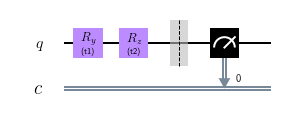

In [112]:
# Simple example

# Define two parameters, t1 and t2
theta1 = Parameter('t1')
theta2 = Parameter('t2')

# Build a 1-qubit circuit
qc = QuantumCircuit(1, 1)

# First parameter, t1, is used for a single qubit rotation of a controlled qubit
qc.ry(theta1,0)
qc.rz(theta2,0)

qc.barrier()

qc.measure(0, 0)

qc.draw(output='mpl')

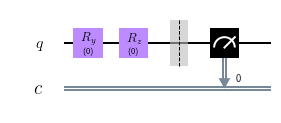

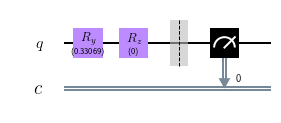

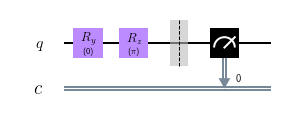

In [113]:
theta1_range = np.linspace(0, 2 * np.pi, 20)
theta2_range = np.linspace(0, np.pi, 2)

circuits = [qc.bind_parameters({theta1: theta_val1, theta2: theta_val2})
            for theta_val2 in theta2_range for theta_val1 in theta1_range ]

# Visualize several circuits to check that correct circuits are generated correctly.
display(circuits[0].draw(output='mpl'))
display(circuits[1].draw(output='mpl'))
display(circuits[20].draw(output='mpl'))

In [114]:
# Execute multiple circuits
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 8192,
              parameter_binds=[{theta1: theta_val1, theta2: theta_val2} 
                               for theta_val2 in theta2_range for theta_val1 in theta1_range])

# Store all counts
counts = [job.result().get_counts(i) for i in range(len(job.result().results))]

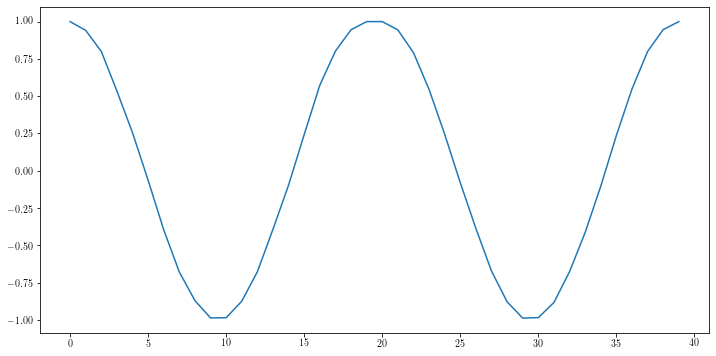

In [117]:
# Plot to visualize the result
plt.figure(figsize=(12,6))
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts: (counts.get('0',0)-counts.get('1',1))/8192,counts)))
plt.show()

## Let's try it on a real quantum device

In [74]:
# IBMQ.disable_account()
provider = IBMQ.enable_account('168a8c034a04e976ce953d744be875833581f9416724197ba86a0ae88614ea5d209ae5fe15b7f582988fb170a2ba64165077ffaaabed9c908551cd5e0f966127')

In [75]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [106]:
# Retrieve IBM Quantum device information
backend_overview()

ibmq_rome                    ibmq_santiago                ibmq_armonk
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 5              Pending Jobs: 5              Pending Jobs: 19
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      65.7           Avg. T1:      130.6          Avg. T1:      183.4
Avg. T2:      77.5           Avg. T2:      128.1          Avg. T2:      218.9



ibmq_essex                   ibmq_burlington              ibmq_london
----------                   ---------------              -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 3              Pending Jobs: 0
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Op

In [86]:
# Execute multiple circuits
job_exp = execute(qc, backend=provider.get_backend('ibmq_essex'), shots = 8192,
              parameter_binds=[{theta1: theta_val1, theta2: theta_val2} 
                               for theta_val2 in theta2_range for theta_val1 in theta1_range])

# Monitor job status
job_monitor(job_exp)

# Store all counts
counts_exp = [job_exp.result().get_counts(i) for i in range(len(job_exp.result().results))]

Job Status: job has successfully run


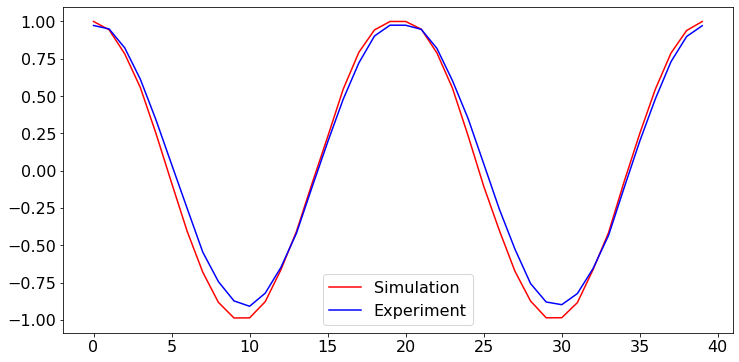

In [92]:
# Plot to visualize the result
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts: (counts.get('0',0)-counts.get('1',1))/8192,counts)),'r',label='Simulation')
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts_exp: (counts_exp.get('0',0)-counts_exp.get('1',1))/8192,counts_exp)),
         'b',label='Experiment')
plt.legend(loc='best')
plt.show()

![classifier_1](jupyter_img/classifier_s1.png)

![classifier_2](jupyter_img/classifier_s2.png)

![classifier_3](jupyter_img/classifier_s3.png)

![classifier_4](jupyter_img/classifier_s4.png)

![classifier_5](jupyter_img/classifier_s5.png)

![classifier_6](jupyter_img/classifier_s6.png)

![classifier_7](jupyter_img/classifier_s7.png)

![classifier_8](jupyter_img/classifier_s8.png)

![classifier_9](jupyter_img/classifier_s9.png)

![classifier_10](jupyter_img/classifier_s10.png)

![classifier_10](jupyter_img/classifier_s11.png)

![classifier_10](jupyter_img/classifier_s12.png)

![classifier_10](jupyter_img/classifier_s13.png)

![classifier_10](jupyter_img/classifier_s14.png)

![classifier_10](jupyter_img/classifier_s15.png)

## Let's try the swap-test classifier

In [118]:
def swaptest(qc,ancilla,qubit1,qubit2):
    qc.h(ancilla)
    qc.cswap(ancilla,qubit1,qubit2)
    qc.h(ancilla)

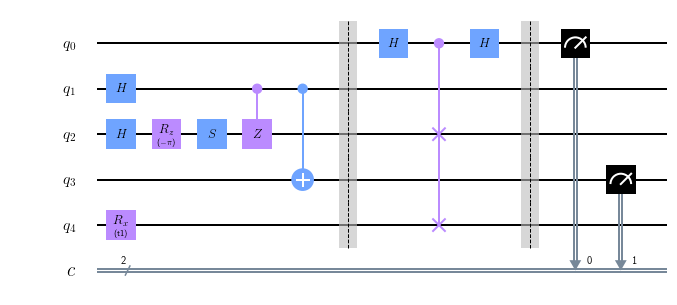

In [119]:
qr = QuantumRegister(5,'q')
cr = ClassicalRegister(2,'c')
qc = QuantumCircuit(qr,cr,name='qclassifier')

# Put equal weights on the training data
qc.h(1)

# Prepare the test data quantum state
theta1 = Parameter('t1')
qc.rx(theta1,4)

# Prepare the training data quantum state
qc.h(2)
qc.rz(-np.pi,2)
qc.s(2)
qc.cz(1,2)

# Put the label
qc.cx(1,3)
qc.barrier()

# Perform swap-test
swaptest(qc,0,2,4)
qc.barrier()

# Measurement
qc.measure(0,0)
qc.measure(3,1)

qc.draw(output='mpl')

## How to estimate $\langle Z\otimes Z\rangle$ from the computational basis measurement?

## $Z\otimes Z = \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\0 & 0 & 0 & 1\end{bmatrix}$

## Thus $\langle Z\otimes Z\rangle$ can be calculated as $\Pr(00) - \Pr(01) - \Pr(10) + \Pr(11)$.

In [120]:
# Select the range of parameters
theta1_range = np.linspace(0, 2 * np.pi, 20)

# Execute multiple circuits
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 8192,
              parameter_binds=[{theta1: theta_val1} for theta_val1 in theta1_range])

# Store all counts
counts = [job.result().get_counts(i) for i in range(len(job.result().results))]

# Let's see how the 'counts' looks like
counts

[{'01': 1007, '10': 3152, '11': 967, '00': 3066},
 {'01': 693, '10': 2743, '11': 1390, '00': 3366},
 {'01': 362, '10': 2444, '11': 1684, '00': 3702},
 {'01': 154, '10': 2237, '11': 1872, '00': 3929},
 {'01': 28, '10': 2032, '11': 2003, '00': 4129},
 {'01': 4, '10': 2030, '11': 2077, '00': 4081},
 {'01': 91, '10': 2149, '11': 1939, '00': 4013},
 {'01': 260, '10': 2321, '11': 1764, '00': 3847},
 {'01': 537, '10': 2612, '11': 1535, '00': 3508},
 {'01': 837, '10': 2939, '11': 1205, '00': 3211},
 {'01': 1201, '10': 3263, '11': 804, '00': 2924},
 {'01': 1539, '10': 3492, '11': 529, '00': 2632},
 {'01': 1748, '10': 3829, '11': 268, '00': 2347},
 {'01': 1955, '10': 4011, '11': 93, '00': 2133},
 {'01': 2040, '10': 4058, '11': 6, '00': 2088},
 {'01': 2124, '10': 3981, '11': 32, '00': 2055},
 {'01': 1863, '10': 3977, '11': 185, '00': 2167},
 {'01': 1668, '10': 3702, '11': 410, '00': 2412},
 {'01': 1302, '10': 3345, '11': 721, '00': 2824},
 {'01': 1044, '10': 3024, '11': 1043, '00': 3081}]

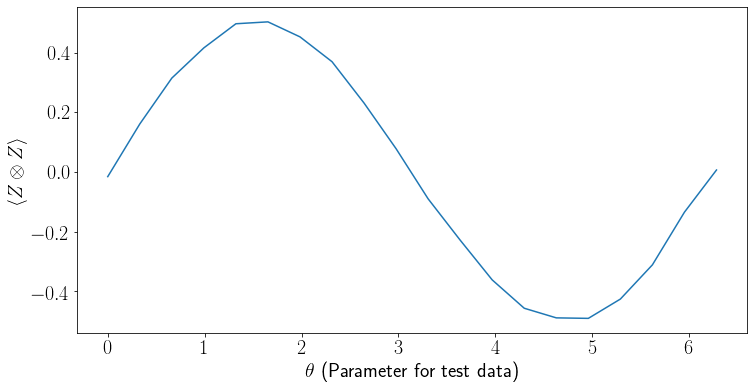

In [131]:
# Plot to visualize the result
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 20})
# How to extract <ZZ>? Answer: <ZZ> = P(00) - P(01) - P(10) + P(11)
plt.plot(theta1_range,
         list(map(lambda counts: (counts.get('00')-counts.get('10')-counts.get('01')+counts.get('11'))/8192,
                  counts)))
plt.rc('text', usetex=True)
plt.xlabel(r'$\theta$ (Parameter for test data)')
plt.ylabel(r'$ \langle Z\otimes Z \rangle $')
plt.show()

## Let's try it on a real quantum device

In [123]:
# Let's also try the same experiment on the 5-qubit device.
# Select the range of parameters
theta1_range = np.linspace(0, 2 * np.pi, 20)

# Execute multiple circuits
job_classifier = execute(qc, backend=provider.get_backend('ibmq_essex'), shots = 8192,
              parameter_binds=[{theta1: theta_val1} for theta_val1 in theta1_range])

# Monitor job status
job_monitor(job_classifier)

# Store all counts
counts_exp = [job_classifier.result().get_counts(i) for i in range(len(job_classifier.result().results))]

Job Status: job has successfully run


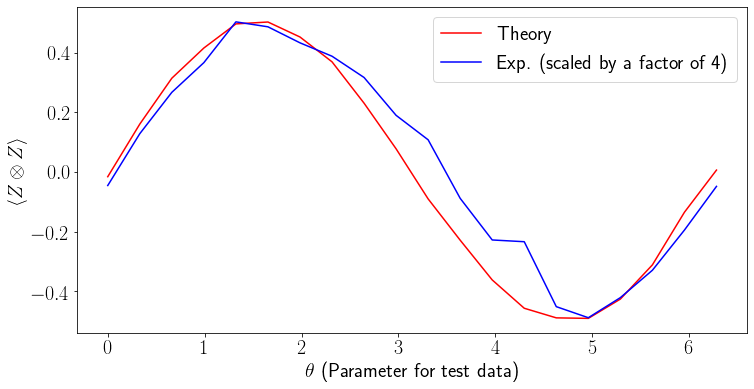

In [132]:
# Plot to visualize the result
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 20})

# Plot theory
plt.plot(theta1_range,
         list(map(lambda counts: (counts.get('00')-counts.get('10')-counts.get('01')+counts.get('11'))/8192,
                  counts)),'r',label='Theory')

# Plot experimental result
plt.plot(theta1_range,
         list(map(lambda counts_exp: 4*(counts_exp.get('00')-counts_exp.get('10')
                                      -counts_exp.get('01')+counts_exp.get('11'))/8192,counts_exp)),'b',
         label='Exp. (scaled by a factor of 4)')

plt.rc('text', usetex=True)
plt.xlabel(r'$\theta$ (Parameter for test data)')
plt.ylabel(r'$ \langle Z\otimes Z \rangle $')
plt.legend(loc='best')
plt.show()

## See https://www.nature.com/articles/s41534-020-0272-6 for more detail.

![hardware](jupyter_img/physical_systems.png)

![hardware](jupyter_img/QuantumHardwareRoadmap.png)

![motivation](jupyter_img/motivation.png)